In [1]:
!pip install pycaret

In [3]:
from pycaret.regression import RegressionExperiment
import pandas as pd
data = pd.read_csv(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\raw_data\raindata.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
print(data.dtypes)
data

T2M                   float64
RH2M                  float64
WS10M                 float64
PRECTOTCORR           float64
WSC                   float64
DATE           datetime64[ns]
dtype: object


,T2M,RH2M,WS10M,PRECTOTCORR,WSC,DATE
0,23.51,92.91,1.94,0.00,1.28,2021-03-16 00:00:00
1,23.31,93.30,1.69,0.00,1.14,2021-03-16 01:00:00
2,23.08,93.99,1.57,0.00,1.07,2021-03-16 02:00:00
3,22.82,94.89,1.62,0.00,1.10,2021-03-16 03:00:00
4,22.54,96.13,1.76,0.00,1.22,2021-03-16 04:00:00
...,...,...,...,...,...,...
29816,25.87,90.32,1.96,0.42,1.67,2025-03-13 19:00:00
29817,25.53,90.78,1.90,1.12,1.48,2025-03-13 20:00:00
29818,25.30,91.08,1.83,0.06,1.38,2025-03-13 21:00:00
29819,25.19,90.62,1.68,0.06,1.22,2025-03-13 22:00:00


In [4]:
s = RegressionExperiment()
s.setup(data, target = 'PRECTOTCORR', session_id = 123) # ตั้งค่า setup parameter

,Description,Value
0,Session id,123
1,Target,PRECTOTCORR
2,Target type,Regression
3,Original data shape,"(29821, 6)"
4,Transformed data shape,"(29821, 8)"
5,Transformed train set shape,"(20874, 8)"
6,Transformed test set shape,"(8947, 8)"
7,Numeric features,4
8,Date features,1
9,Preprocess,True


In [5]:
best_model = s.compare_models()


In [18]:
tune_model = s.tune_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:16:59
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [19]:
s.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

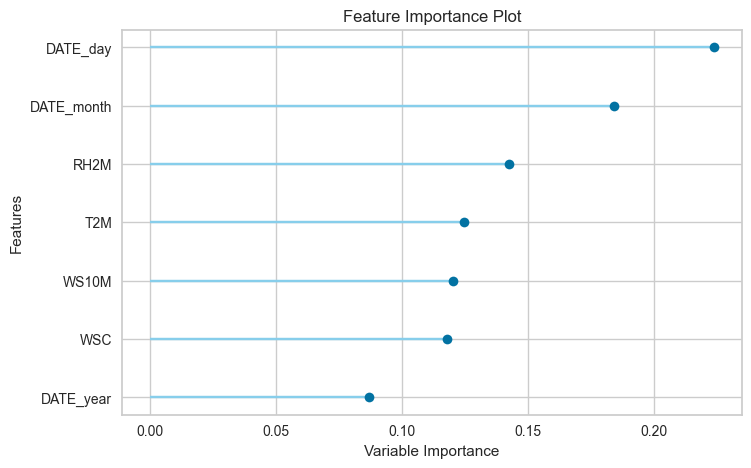

In [20]:
s.plot_model(best_model,plot = "feature")

In [7]:
predict_test_data =  s.predict_model(best_model)
predict_test_data

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.7816,8.2193,2.8669,0.6254,0.5472,6.9111


,T2M,RH2M,WS10M,WSC,DATE,PRECTOTCORR,prediction_label
7306,23.410000,96.089996,2.15,1.73,2022-03-10 05:00:00,0.120000,0.3317
15960,26.090000,93.769997,1.88,1.46,2023-05-03 01:00:00,19.059999,13.1897
19594,25.940001,92.070000,1.29,0.99,2023-10-28 02:00:00,13.430000,7.5266
20404,27.700001,85.570000,1.92,1.25,2023-12-11 08:00:00,0.530000,2.8287
23047,26.360001,87.360001,1.97,1.61,2024-04-11 02:00:00,0.000000,0.0484
...,...,...,...,...,...,...,...
15942,26.700001,92.709999,1.97,1.76,2023-05-01 22:00:00,2.930000,6.5444
22336,28.870001,72.690002,1.88,1.20,2024-03-09 08:00:00,0.580000,0.5458
11520,24.660000,95.599998,3.06,2.03,2022-09-28 07:00:00,14.830000,7.9343
15751,27.110001,90.410004,2.39,2.05,2023-04-23 21:00:00,0.720000,1.4338


In [8]:
print("predict testset")
predict_test_data[['PRECTOTCORR','prediction_label']] # predict testset

predict testset


,PRECTOTCORR,prediction_label
7306,0.120000,0.3317
15960,19.059999,13.1897
19594,13.430000,7.5266
20404,0.530000,2.8287
23047,0.000000,0.0484
...,...,...
15942,2.930000,6.5444
22336,0.580000,0.5458
11520,14.830000,7.9343
15751,0.720000,1.4338


In [9]:
new_data = data.copy().drop(['PRECTOTCORR'], axis=1)
predictions = s.predict_model(best_model,data = new_data)
print("****predict_alldata****")
predictions

****predict_alldata****


,T2M,RH2M,WS10M,WSC,DATE,prediction_label
0,23.510000,92.910004,1.94,1.28,2021-03-16 00:00:00,0.0000
1,23.309999,93.300003,1.69,1.14,2021-03-16 01:00:00,0.0000
2,23.080000,93.989998,1.57,1.07,2021-03-16 02:00:00,0.0000
3,22.820000,94.889999,1.62,1.10,2021-03-16 03:00:00,0.0000
4,22.540001,96.129997,1.76,1.22,2021-03-16 04:00:00,0.0000
...,...,...,...,...,...,...
29816,25.870001,90.320000,1.96,1.67,2025-03-13 19:00:00,0.5897
29817,25.530001,90.779999,1.90,1.48,2025-03-13 20:00:00,1.1200
29818,25.299999,91.080002,1.83,1.38,2025-03-13 21:00:00,0.0600
29819,25.190001,90.620003,1.68,1.22,2025-03-13 22:00:00,0.0600


In [10]:
s.save_model(best_model, r'C:\Users\ASUS\Desktop\projectforecastpm2_5\models\rainny_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['DATE'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['T2M', 'RH2M', 'WS10M', 'WSC'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'C:\\Users\\ASUS\\Desktop\\projectforecastpm2_5\\models\\rainny_model.pkl')

In [ ]:
!pip install numpy

In [13]:
from pycaret.regression import load_model, predict_model
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
data2_rain = pd.read_csv(r"C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\raw_data\raindata.csv")
data2_rain['DATE'] = pd.to_datetime(data2_rain['DATE'])
import pandas as pd
from datetime import timedelta
import random

def forecast_rainfall_next_7_days(model, user_input_features):
    """
    ทำนายปริมาณฝนสำหรับ 7 วันข้างหน้าโดยใช้ค่าที่ผู้ใช้กรอก
    """
    # สร้างรายการวันที่สำหรับ 7 วันข้างหน้า (ทุกชั่วโมง)
    last_date = data2_rain['DATE'].max()
    future_hours = [last_date + timedelta(hours=i+1) for i in range(7 * 24)]  # 7 วัน * 24 ชั่วโมง
    future_data = []
    
    # ใช้ค่าที่ผู้ใช้กรอก
    T2M = user_input_features.get('T2M', 25.0)
    RH2M = user_input_features.get('RH2M', 70.0)
    WS10M = user_input_features.get('WS10M', 5.0)
    WSC = user_input_features.get('WSC', 2.0)
    
    # ทำนายปริมาณฝนสำหรับแต่ละชั่วโมง
    for i, future_hour in enumerate(future_hours):
        # สุ่มค่าของ feature แต่ละตัวให้แตกต่างกันในแต่ละวัน
        day_offset = (i // 24) + 1  # คำนวณวันที่ (1-7)
        
        new_row = {
            'DATE': future_hour,
            'T2M': max(0, T2M + random.uniform(-1, 1) * day_offset),  # สุ่มค่า T2M และป้องกันค่าติดลบ
            'RH2M': max(0, RH2M + random.uniform(-2, 2) * day_offset),  # สุ่มค่า RH2M และป้องกันค่าติดลบ
            'WS10M': max(0, WS10M + random.uniform(-0.5, 0.5) * day_offset),  # สุ่มค่า WS10M และป้องกันค่าติดลบ
            'WSC': max(0, WSC + random.uniform(-0.2, 0.2) * day_offset),  # สุ่มค่า WSC และป้องกันค่าติดลบ
        }
        
        # ทำนายปริมาณฝน
        prediction_df = pd.DataFrame([new_row])
        rainfall_prediction = predict_model(model, data=prediction_df)
        new_row['PRECTOTCORR'] = rainfall_prediction['prediction_label'].iloc[0]
        
        # ทำให้ค่าเป็นบวกเสมอ
        new_row['PRECTOTCORR'] = max(0, new_row['PRECTOTCORR'])
        
        future_data.append(new_row)
    
    return pd.DataFrame(future_data)

# ตัวอย่างการใช้งาน
x = {'T2M': 25, 'RH2M': 70, 'WS10M': 5, 'WSC': 2}
model_rainfall = load_model(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\models\rainny_model')
forecast_result = forecast_rainfall_next_7_days(model_rainfall, x)
print(forecast_result)

Transformation Pipeline and Model Successfully Loaded
                   DATE        T2M       RH2M     WS10M       WSC  PRECTOTCORR
0   2025-03-14 00:00:00  25.895512  69.725015  5.335169  2.145519       8.3840
1   2025-03-14 01:00:00  25.773192  71.441898  5.111541  1.920561       8.2557
2   2025-03-14 02:00:00  25.813257  68.879416  4.549605  2.159996       8.2142
3   2025-03-14 03:00:00  24.770712  69.623891  5.343524  2.107537       7.8327
4   2025-03-14 04:00:00  24.143024  71.187648  4.974949  1.917644       6.9663
..                  ...        ...        ...       ...       ...          ...
163 2025-03-20 19:00:00  27.209081  64.412173  7.137595  1.373370       5.9828
164 2025-03-20 20:00:00  23.597073  59.344248  6.111111  2.789772       6.0509
165 2025-03-20 21:00:00  29.665497  67.648161  7.850307  0.759722       6.6437
166 2025-03-20 22:00:00  18.548265  73.342469  7.119639  1.160830       6.6154
167 2025-03-20 23:00:00  29.745750  69.565627  3.808884  1.524548       7.455